# Exploratory data analysis on FIFA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from collections import Counter
%matplotlib inline

import os
for dirname, _,filesnames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

import warnings                                 #ignore warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [2]:
fifa = pd.read_csv(r"C:\Users\ankus\Desktop\NareshIT\2. Notes\7. EDA\Seaborn - SPORT\FIFA.csv")
fifa

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [3]:
fifa.shape

(18207, 89)

In [4]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
fifa.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [6]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
len(fifa.columns)

89

In [8]:
fifa.describe()                 #discriptive analysis

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [9]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [10]:
fifa['Body Type'].value_counts()

Body Type
Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: count, dtype: int64

In [11]:
fifa.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

# #Visualization

# 1.Explore age Variable

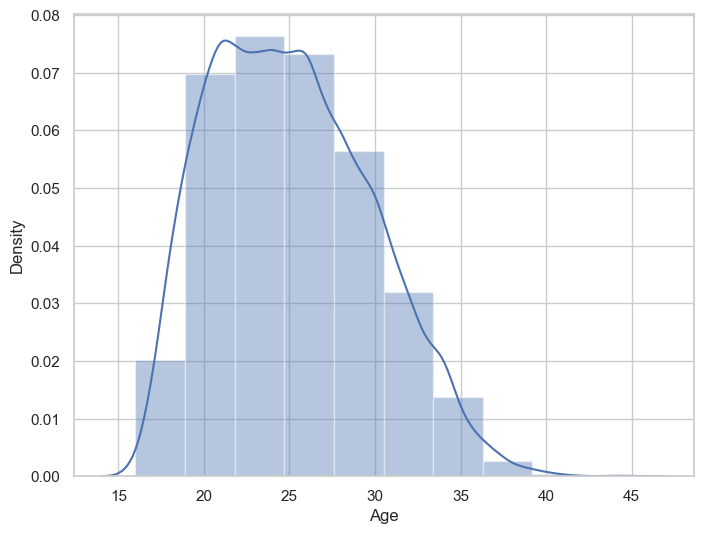

In [12]:
f,ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
ax =sns.distplot(x,bins=10)
plt.show()                     # it shows slightly positively skewed

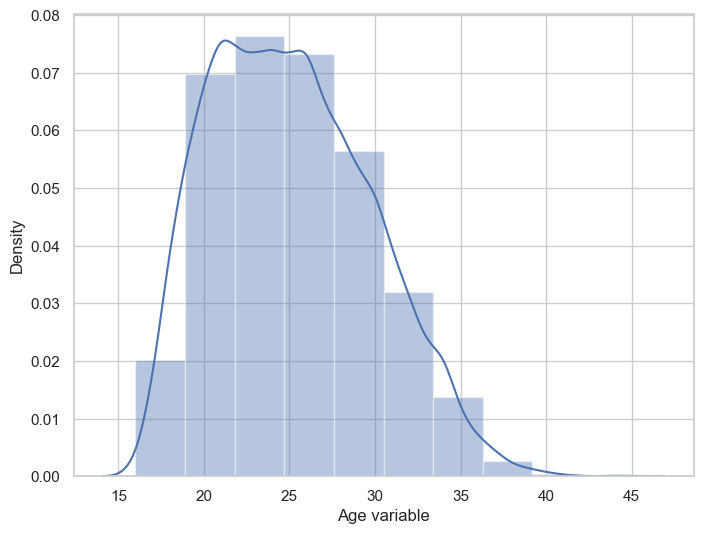

In [13]:
#We can use Pandas series object to get an informative axis label 
f,ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
x =pd.Series(x,name='Age variable')
ax = sns.distplot(x,bins=10)
plt.show()

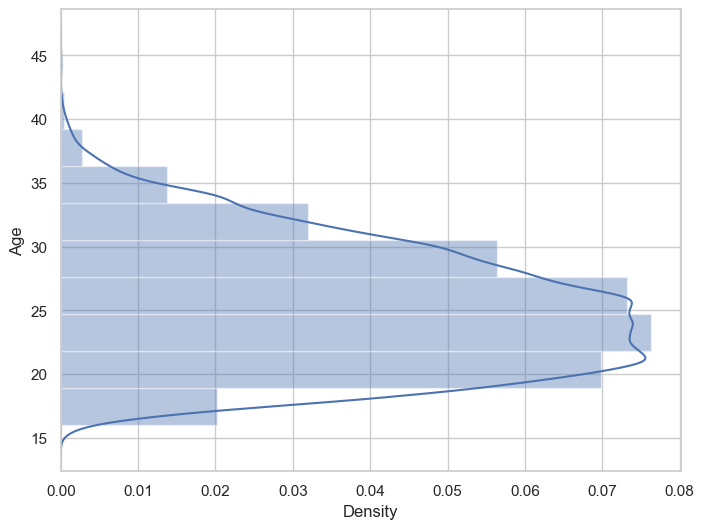

In [14]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
ax = sns.distplot(x, bins=10, vertical = True)
plt.show()

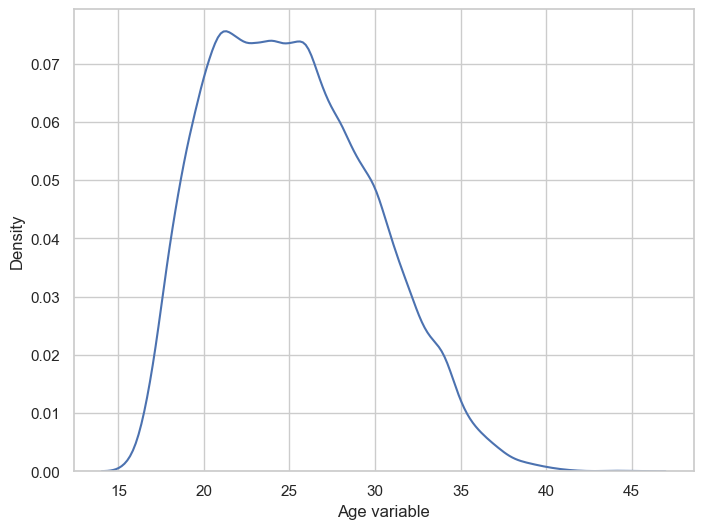

In [15]:
f,ax = plt.subplots(figsize=(8,6))
x =fifa['Age']
x = pd.Series(x,name='Age variable')
ax =sns.kdeplot(x)
plt.show()

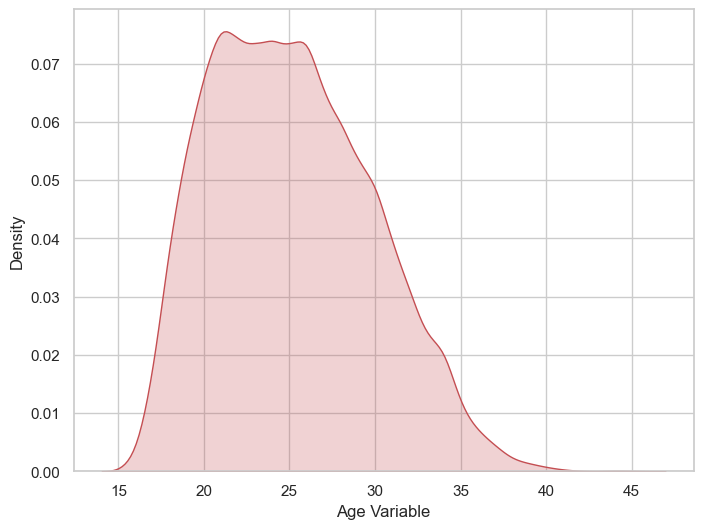

In [16]:
#We can shade under the density curve and use a different color

f,ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
x=pd.Series(x,name='Age Variable')
ax =sns.kdeplot(x,shade=True,color='r')
plt.show()                

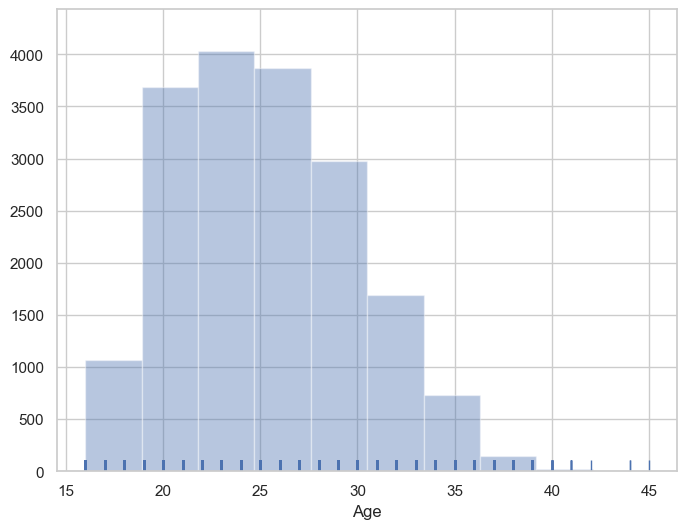

In [17]:
#historam
f,ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
ax =sns.distplot(x,kde=False,rug=True,bins=10)
plt.show()                

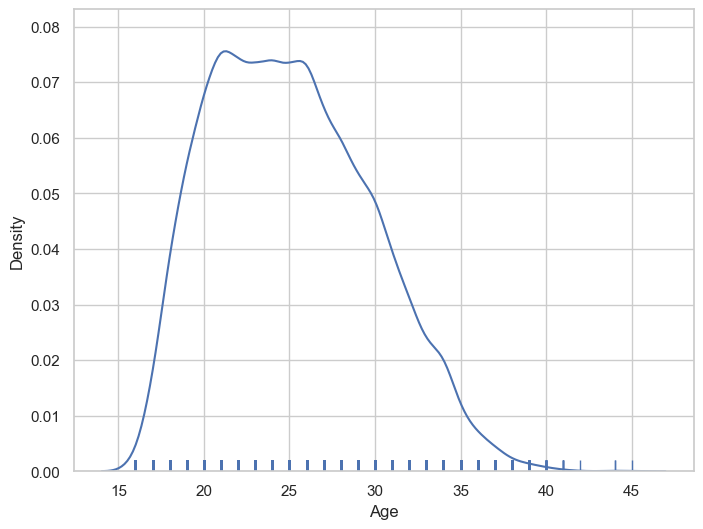

In [18]:
f,ax = plt.subplots(figsize=(8,6))
x = fifa['Age']
ax =sns.distplot(x,hist=False,rug=True,bins=10)
plt.show() 

# 2.Explore Preferred Foot variable

In [19]:
fifa['Preferred Foot'].nunique()

2

In [20]:
fifa['Preferred Foot'].unique()

array(['Left', 'Right', nan], dtype=object)

In [21]:
fifa['Preferred Foot'].value_counts()

Preferred Foot
Right    13948
Left      4211
Name: count, dtype: int64

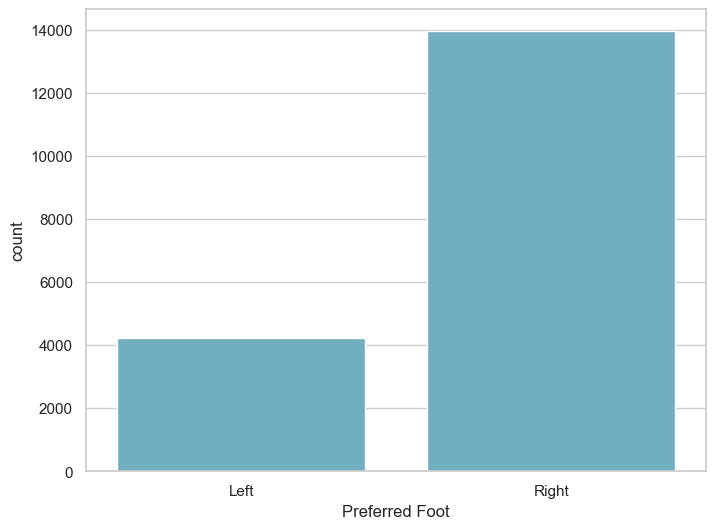

In [22]:
f ,ax= plt.subplots(figsize=(8,6))
sns.countplot(x='Preferred Foot',data=fifa,color='c')
plt.show()

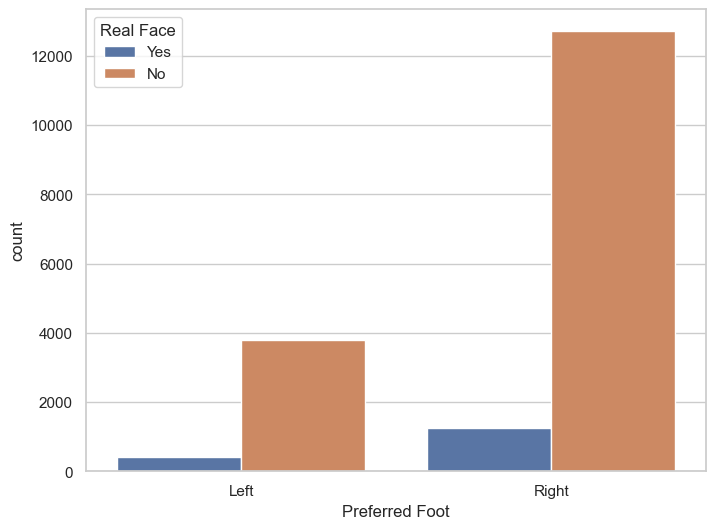

In [23]:
f ,ax= plt.subplots(figsize=(8,6))
sns.countplot(x='Preferred Foot',data=fifa,hue ='Real Face')
plt.show()

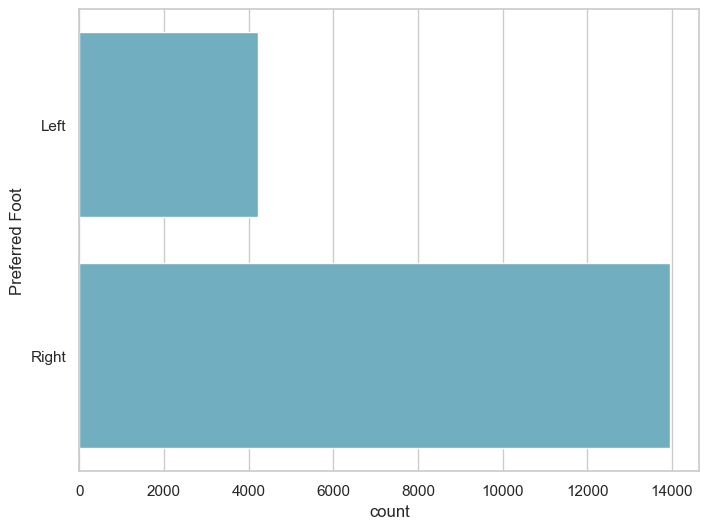

In [24]:
#vertically plot
f ,ax= plt.subplots(figsize=(8,6))
sns.countplot(y='Preferred Foot',data=fifa,color='c')
plt.show()

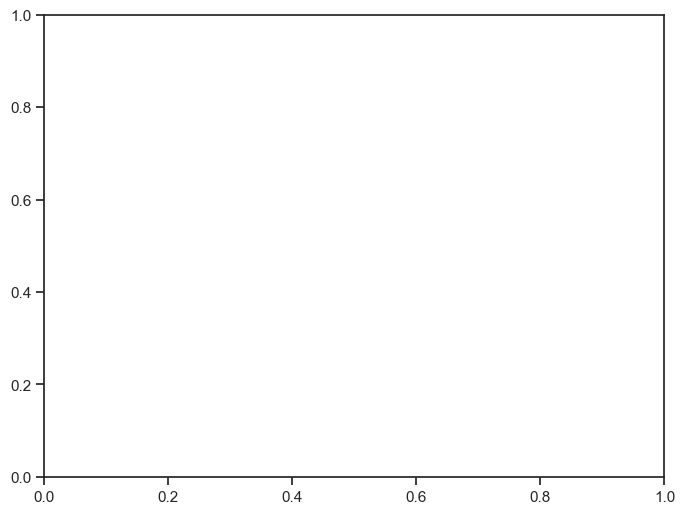

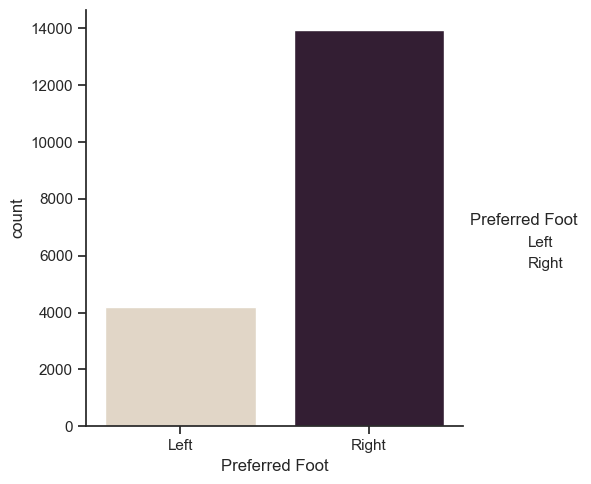

In [78]:
f ,ax= plt.subplots(figsize=(8,6))
sns.catplot(x='Preferred Foot',data=fifa,kind='count',palette='ch:.25')
plt.show()

# Explore 'International Reputation' variable

In [26]:
fifa['International Reputation'].nunique()

5

In [27]:
fifa['International Reputation'].value_counts()

International Reputation
1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: count, dtype: int64

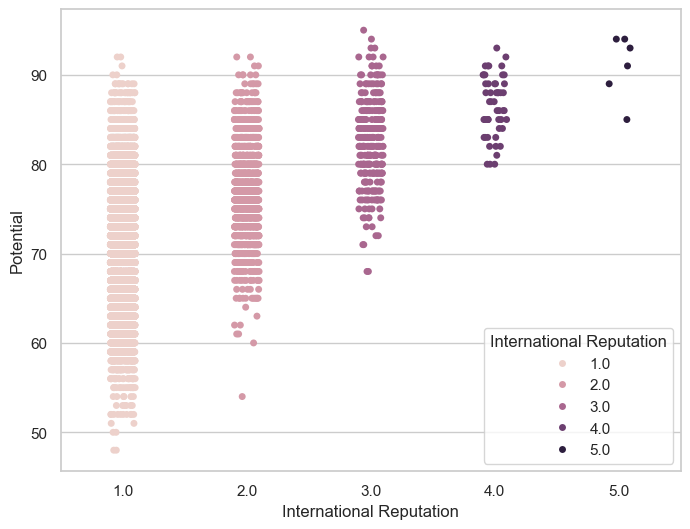

In [28]:
f ,ax= plt.subplots(figsize=(8,6))
sns.stripplot(x='International Reputation',y='Potential',data=fifa,hue='International Reputation')
plt.show()

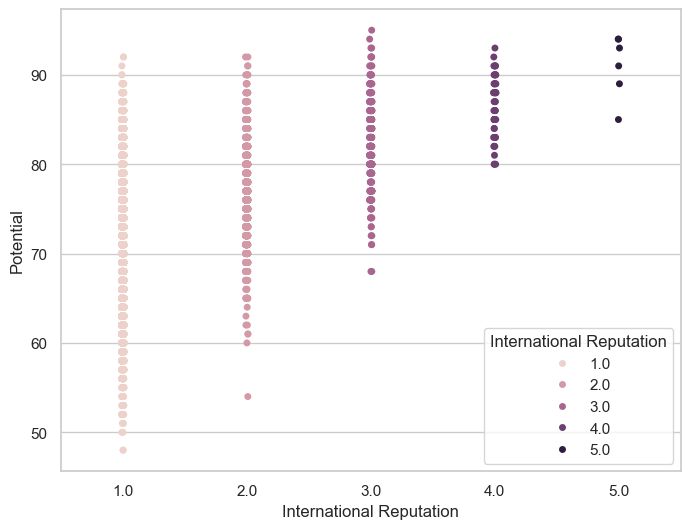

In [29]:
#We can add jitter to bring out the distribution of values

f ,ax= plt.subplots(figsize=(8,6))
sns.stripplot(x='International Reputation',y='Potential',data=fifa,jitter=0.01,hue='International Reputation')
plt.show()

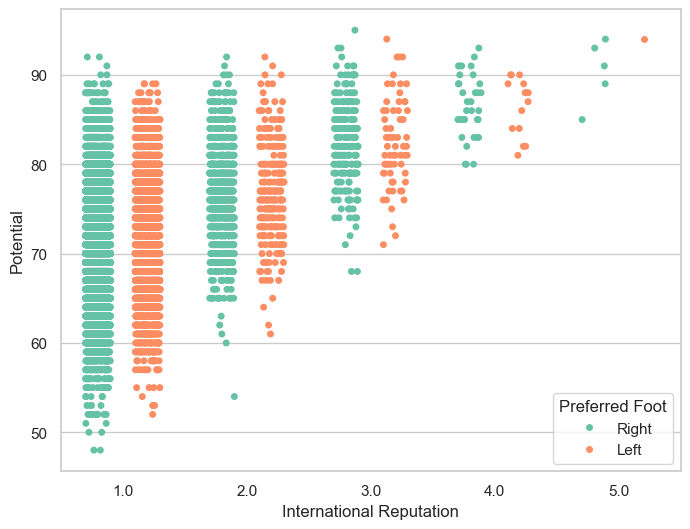

In [30]:
#We can nest the strips within a second categorical variable - `Preferred Foot`

f ,ax= plt.subplots(figsize=(8,6))
sns.stripplot(x='International Reputation',y='Potential',data=fifa,hue='Preferred Foot',jitter=0.2,palette='Set2',dodge=True)
plt.show()

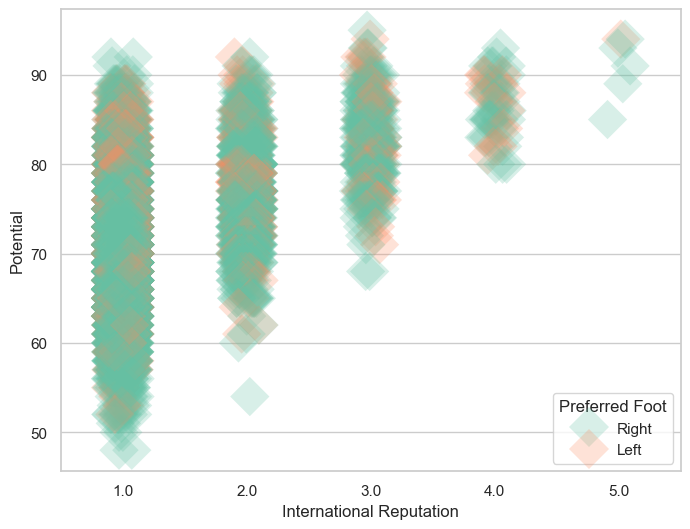

In [31]:
#We can draw strips with large points and different aesthetics

f ,ax= plt.subplots(figsize=(8,6))
sns.stripplot(x='International Reputation',y='Potential',data=fifa,hue='Preferred Foot',size=20,palette='Set2',marker='D',edgecolor='gray',alpha=.25)
plt.show()

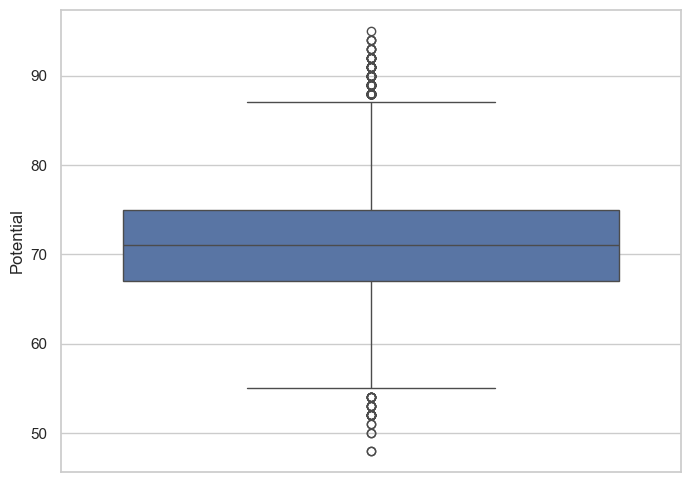

In [32]:
f ,ax= plt.subplots(figsize=(8,6))
x=fifa['Potential']
sns.boxplot(x)
plt.show()

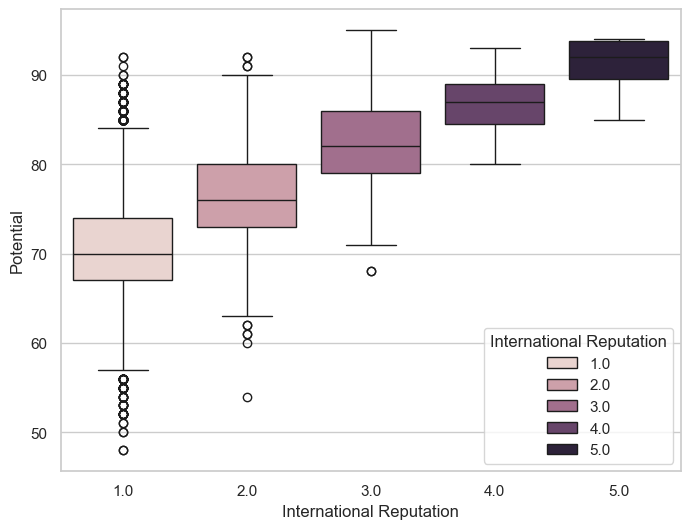

In [33]:
f ,ax= plt.subplots(figsize=(8,6))
sns.boxplot(x='International Reputation',y='Potential',data=fifa,hue='International Reputation')
plt.show()

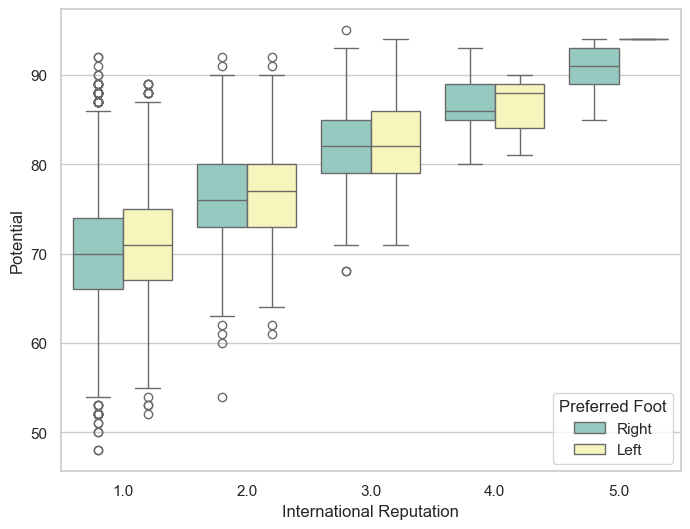

In [34]:
# We can draw a boxplot with nested grouping by two categorical variables

f ,ax= plt.subplots(figsize=(8,6))
sns.boxplot(x='International Reputation',y='Potential',data=fifa,hue='Preferred Foot',palette='Set3')
plt.show()

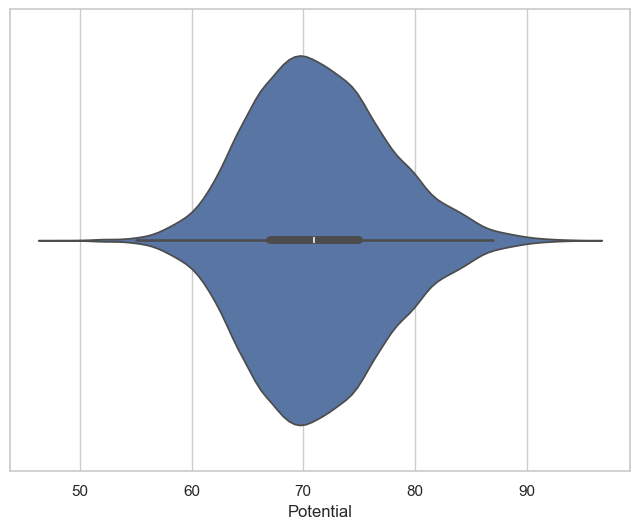

In [35]:
#violinplot() function

f ,ax= plt.subplots(figsize=(8,6))
sns.violinplot(x=fifa['Potential'])
plt.show()

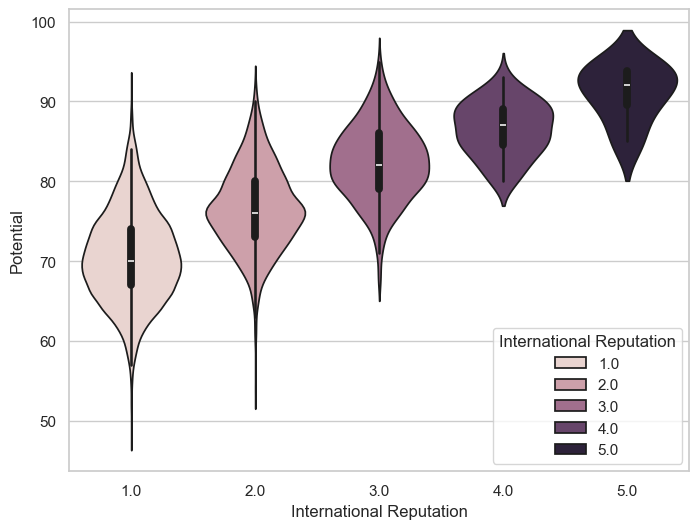

In [36]:
#We can draw the vertical violinplot grouped by the categorical variable `International Reputation`

f ,ax= plt.subplots(figsize=(8,6))
sns.violinplot(x='International Reputation',y='Potential',data=fifa,hue='International Reputation')
plt.show()

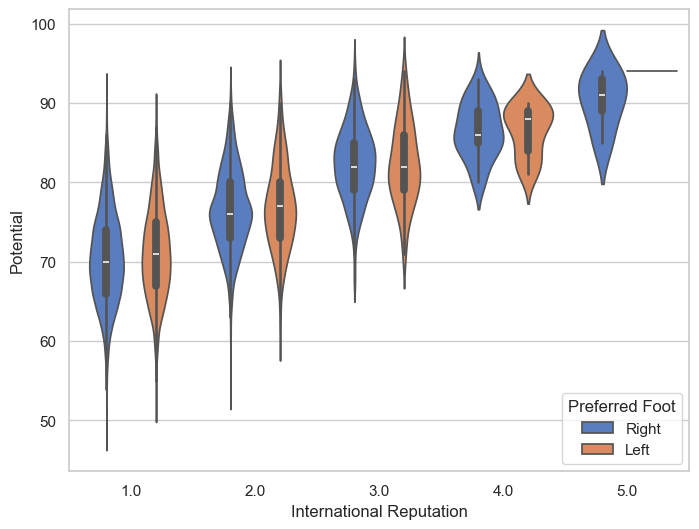

In [37]:
f ,ax= plt.subplots(figsize=(8,6))
sns.violinplot(x='International Reputation',y='Potential',data=fifa,hue='Preferred Foot',palette='muted')
plt.show()

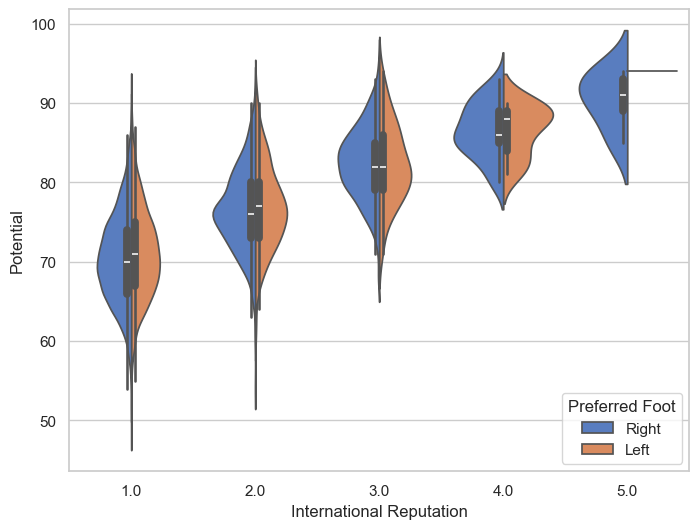

In [38]:
#We can draw split violins to compare the across the hue variable 

f ,ax= plt.subplots(figsize=(8,6))
sns.violinplot(x='International Reputation',y='Potential',data=fifa,hue='Preferred Foot',palette='muted',split=True)
plt.show()

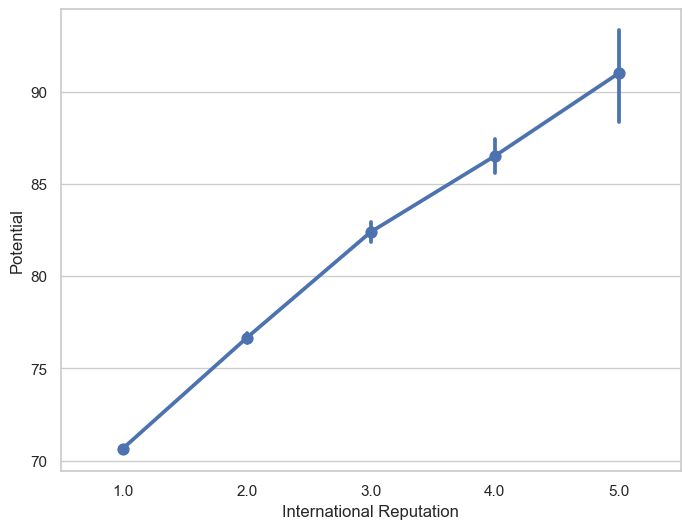

In [39]:
# pointplot

f ,ax= plt.subplots(figsize=(8,6))
sns.pointplot(x='International Reputation',y='Potential',data=fifa)
plt.show()

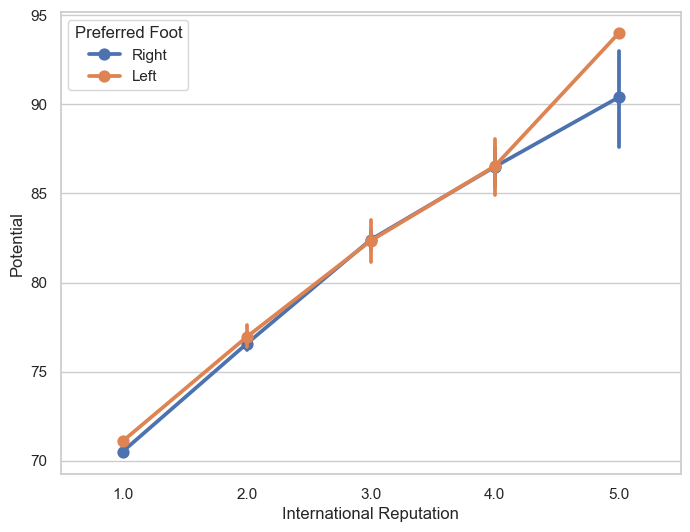

In [40]:
# We can draw a set of vertical points with nested grouping by a two variables 
f ,ax= plt.subplots(figsize=(8,6))
sns.pointplot(x='International Reputation',y='Potential',data=fifa,hue="Preferred Foot")
plt.show()

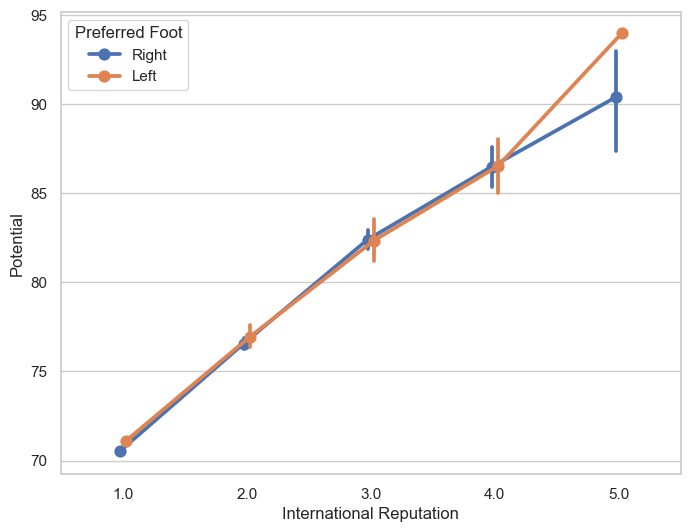

In [41]:
# We can separate the points for different hue levels along the categorical axis
f ,ax= plt.subplots(figsize=(8,6))
sns.pointplot(x='International Reputation',y='Potential',data=fifa,hue="Preferred Foot",dodge=True)
plt.show()

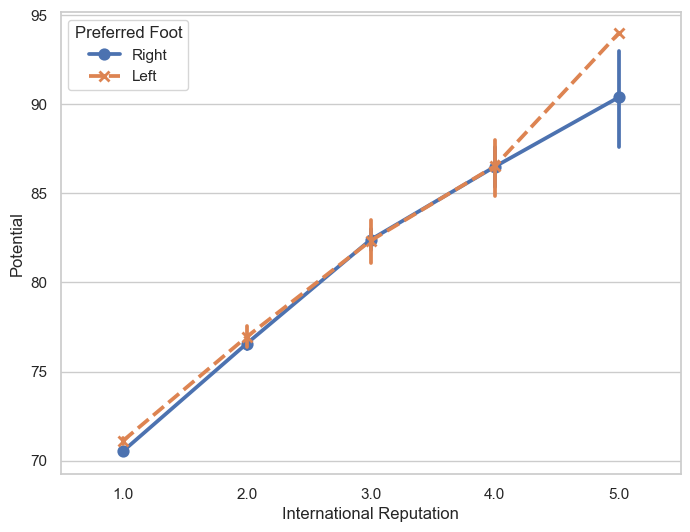

In [42]:
#We can use a different marker and line style for the hue levels

f ,ax= plt.subplots(figsize=(8,6))
sns.pointplot(x='International Reputation',y='Potential',data=fifa,hue="Preferred Foot",markers=['o','x'],linestyles=['-','--'])
plt.show()

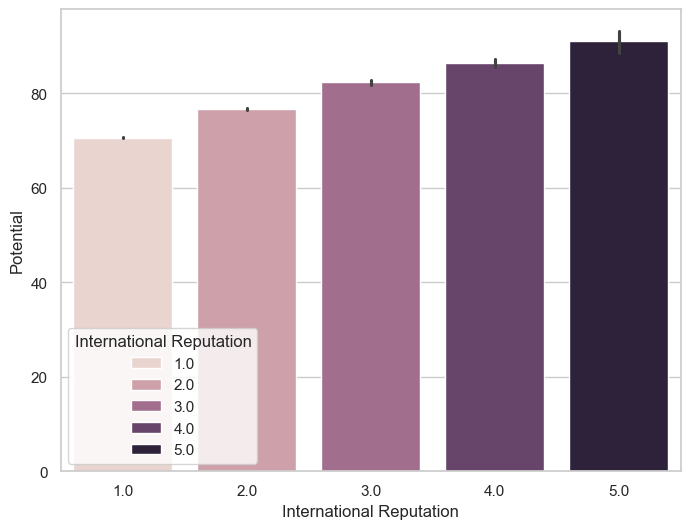

In [43]:
# barplot()

f ,ax= plt.subplots(figsize=(8,6))
sns.barplot(x='International Reputation',y='Potential',data=fifa,hue='International Reputation')
plt.show()

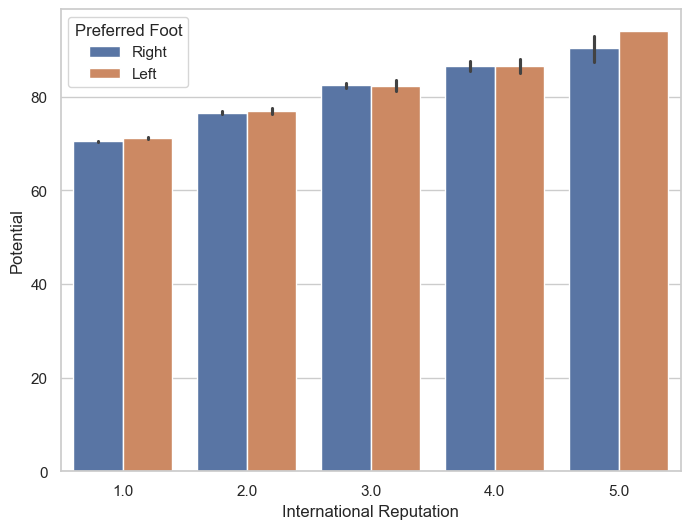

In [44]:
#We can draw a set of vertical bars with nested grouping by a two variables
f ,ax= plt.subplots(figsize=(8,6))
sns.barplot(x='International Reputation',y='Potential',data=fifa,hue='Preferred Foot')
plt.show()

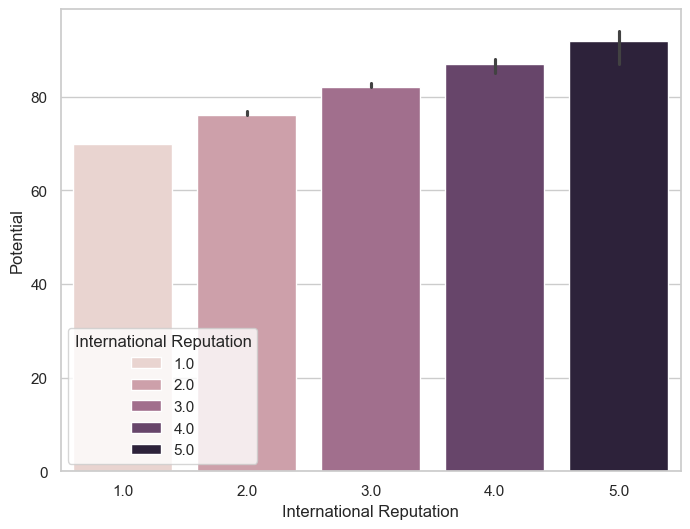

In [45]:
# We can use median as the estimate of central tendency 
from numpy import median
f ,ax= plt.subplots(figsize=(8,6))
sns.barplot(x='International Reputation',y='Potential',data=fifa,estimator=median,hue='International Reputation')
plt.show()

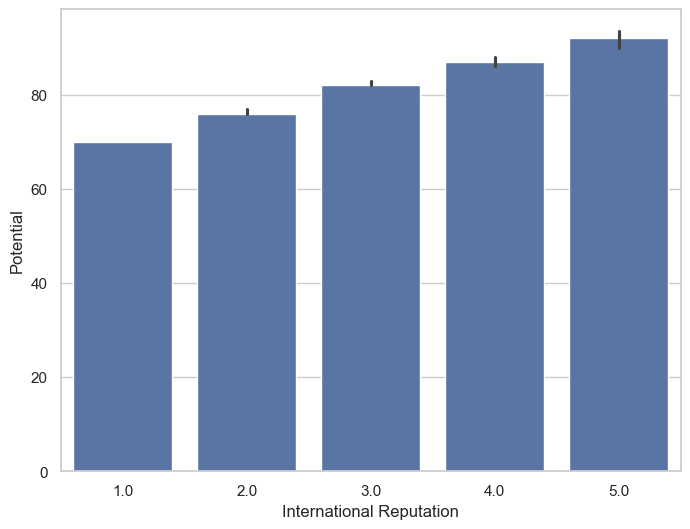

In [46]:
#We can show the standard error of the mean with the error bars

f ,ax= plt.subplots(figsize=(8,6))
sns.barplot(x='International Reputation',y='Potential',data=fifa,estimator=median,ci=68)
plt.show()

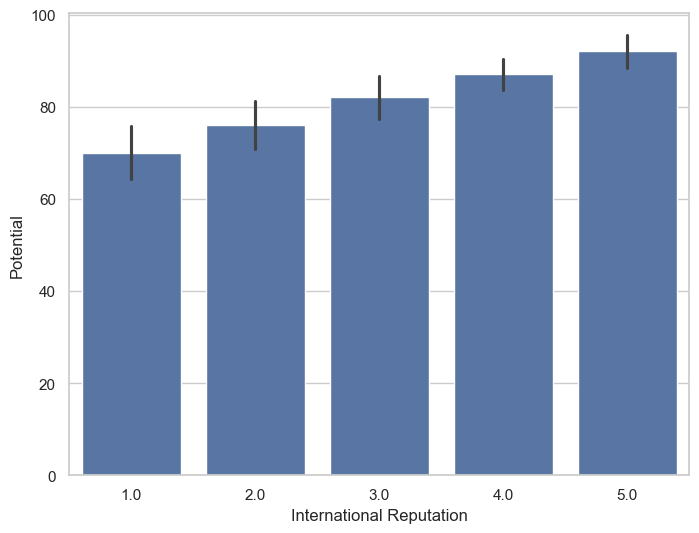

In [47]:
# We can show standard deviation of observations instead of a confidence interval
f ,ax= plt.subplots(figsize=(8,6))
sns.barplot(x='International Reputation',y='Potential',data=fifa,estimator=median,ci='sd')
plt.show()

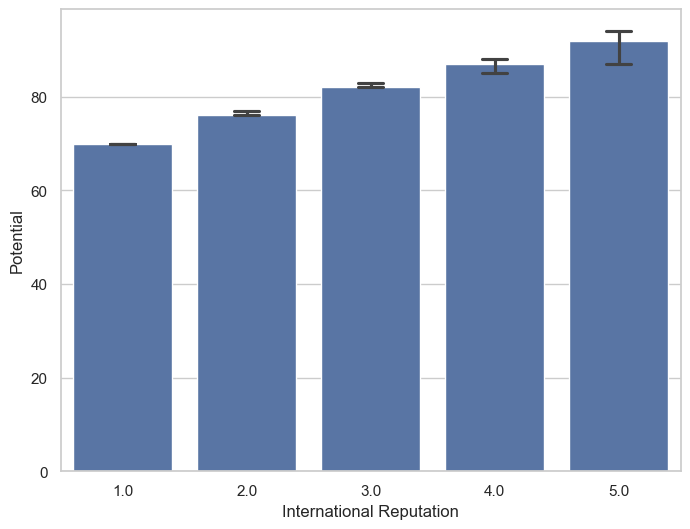

In [48]:
# We can add “caps” to the error bars 

f ,ax= plt.subplots(figsize=(8,6))
sns.barplot(x='International Reputation',y='Potential',data=fifa,estimator=median,capsize=0.2)
plt.show()

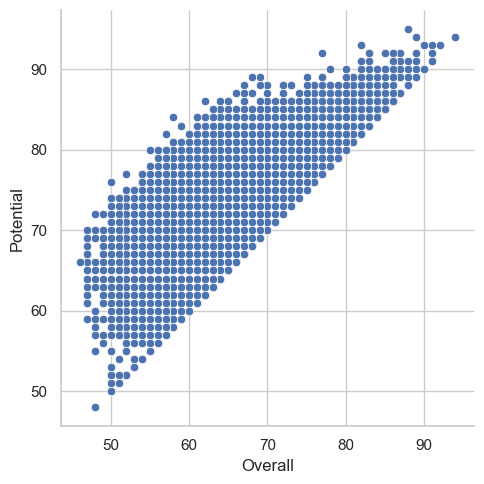

In [49]:
# We can plot a scatterplot with variables `Heigh` and `Weight` with Seaborn `relplot()` function 
sns.relplot(x='Overall',y='Potential',data=fifa)
plt.show()

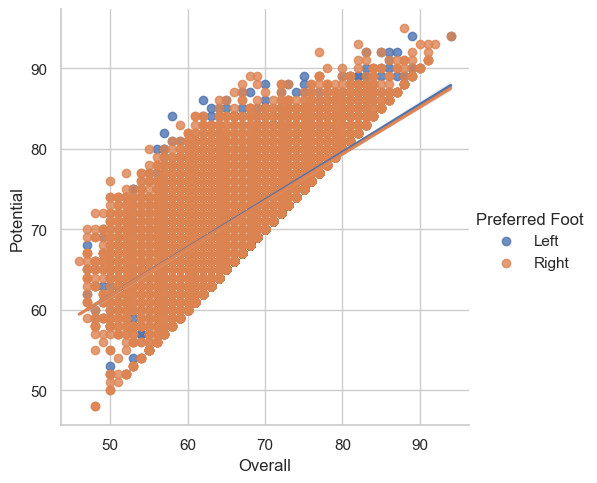

In [50]:
#We can condition on a third variable and plot the levels in different colors
sns.lmplot(x='Overall',y='Potential',hue='Preferred Foot',data=fifa)
plt.show()

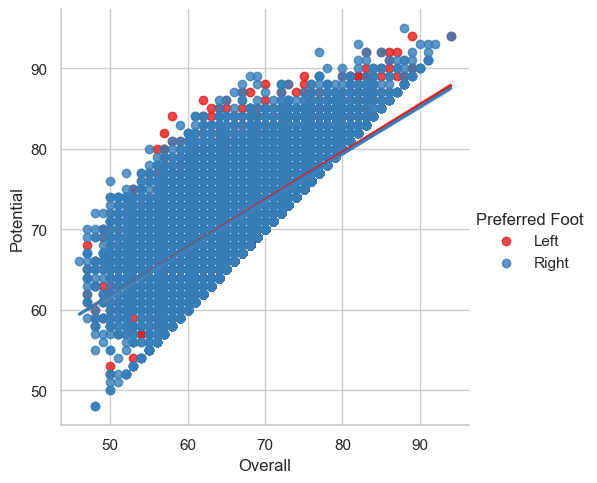

In [51]:
#We can use a different color palette
sns.lmplot(x='Overall',y='Potential',hue='Preferred Foot',data=fifa,palette='Set1')
plt.show()

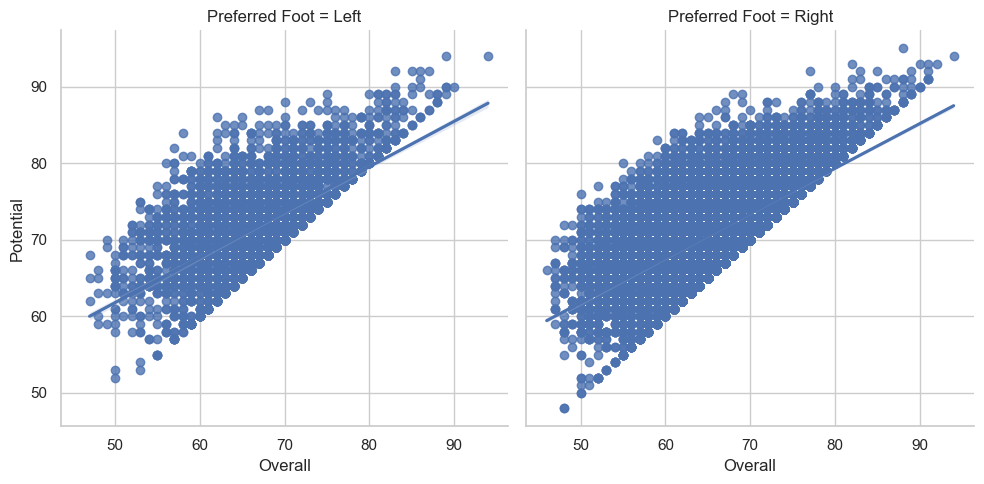

In [52]:
 #We can plot the levels of the third variable across different columns

sns.lmplot(x='Overall',y='Potential',col='Preferred Foot',data=fifa)
plt.show()

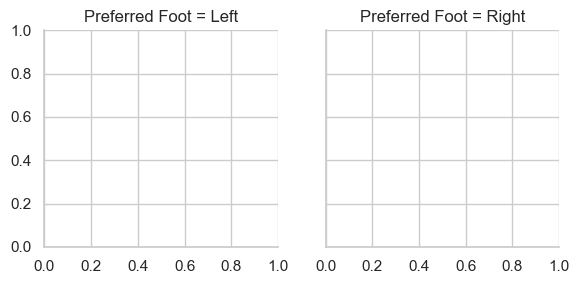

In [53]:
#Facetgrid function

sns.FacetGrid(fifa,col='Preferred Foot')
plt.show()

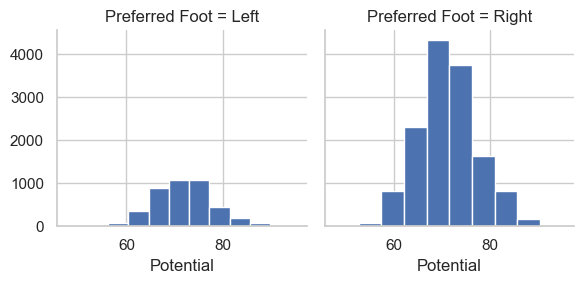

In [54]:
# We can draw a univariate plot of `Potential` variable on each facet 

g = sns.FacetGrid(fifa,col='Preferred Foot')
g= g.map(plt.hist,'Potential')
plt.show()

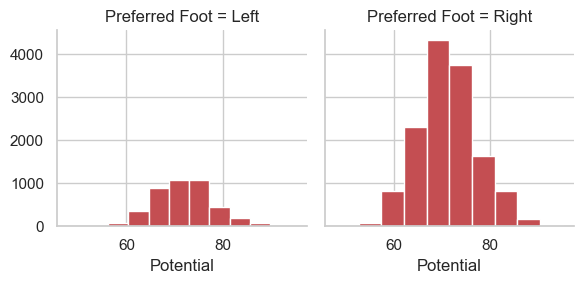

In [55]:
g = sns.FacetGrid(fifa,col='Preferred Foot')
g= g.map(plt.hist,'Potential',bins=10,color='r')
plt.show()

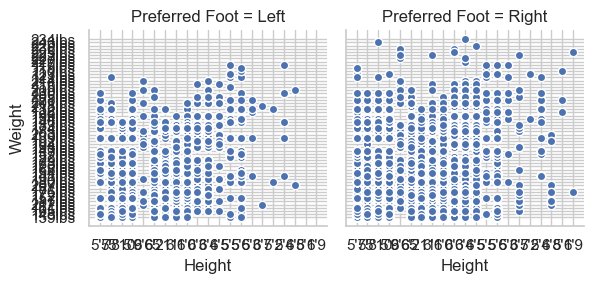

In [56]:
# We can plot a bivariate function on each facet

g = sns.FacetGrid(fifa,col='Preferred Foot')
g= (g.map(plt.scatter,'Height','Weight',edgecolor='w').add_legend())
plt.show()

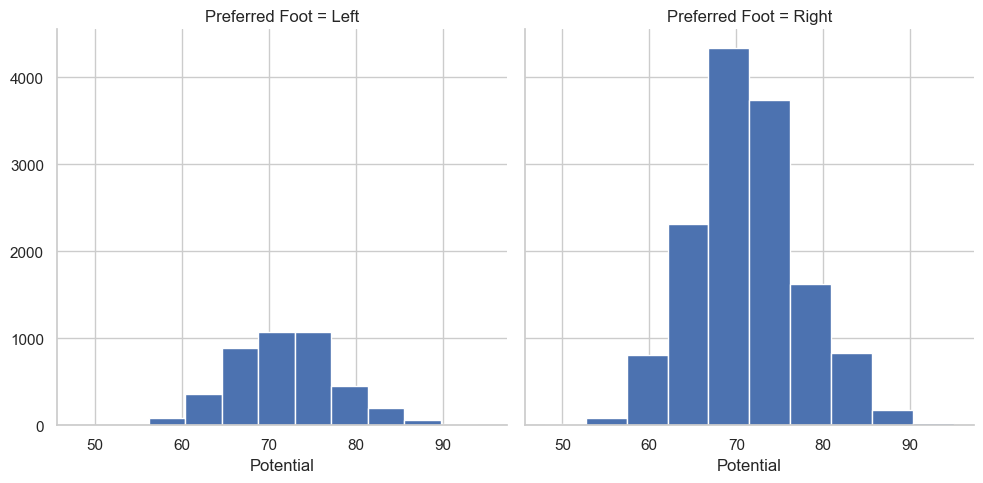

In [57]:
#The size of the figure is set by providing the height of each facet, along with the aspect ratio:
g = sns.FacetGrid(fifa,col='Preferred Foot',height=5,aspect=1)
g= g.map(plt.hist,'Potential')
plt.show()

In [58]:
# pairgrid() function

fifa_new = fifa[['Age', 'Potential', 'Strength', 'Stamina', 'Preferred Foot']]

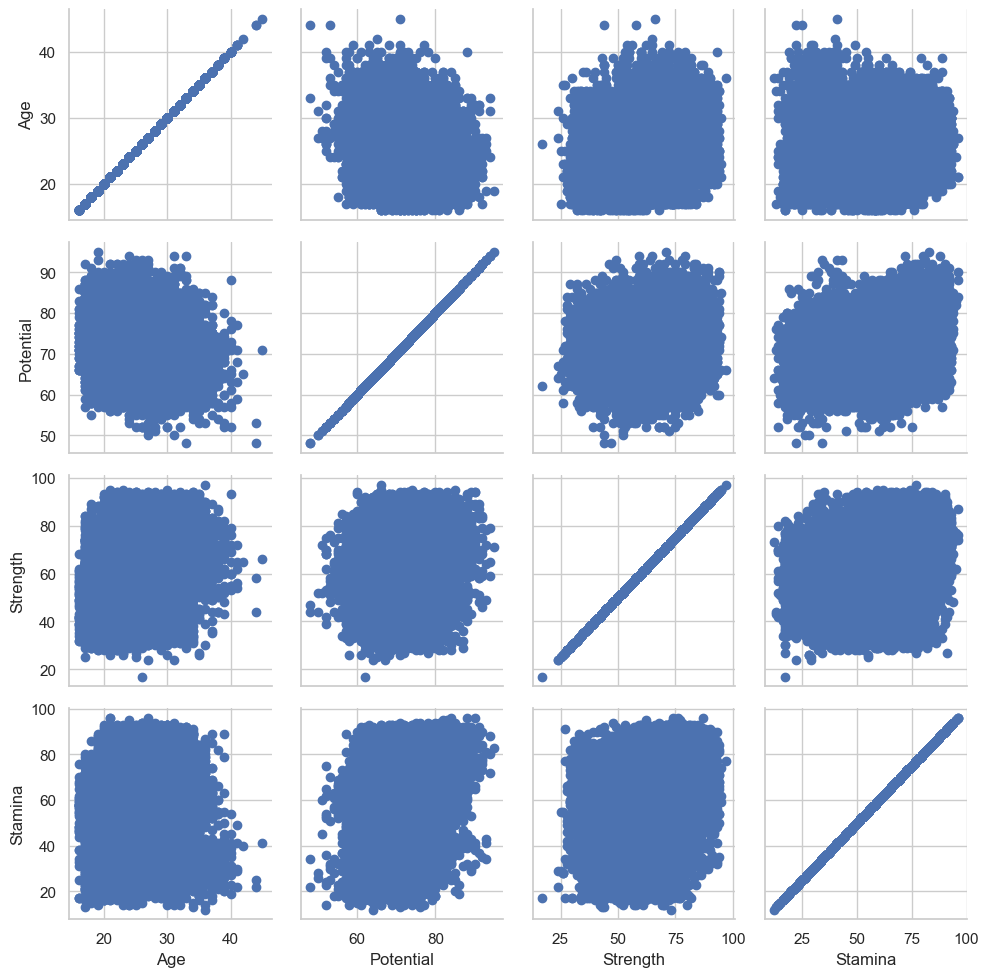

In [59]:
g=sns.PairGrid(fifa_new)
g=g.map(plt.scatter)
plt.show()

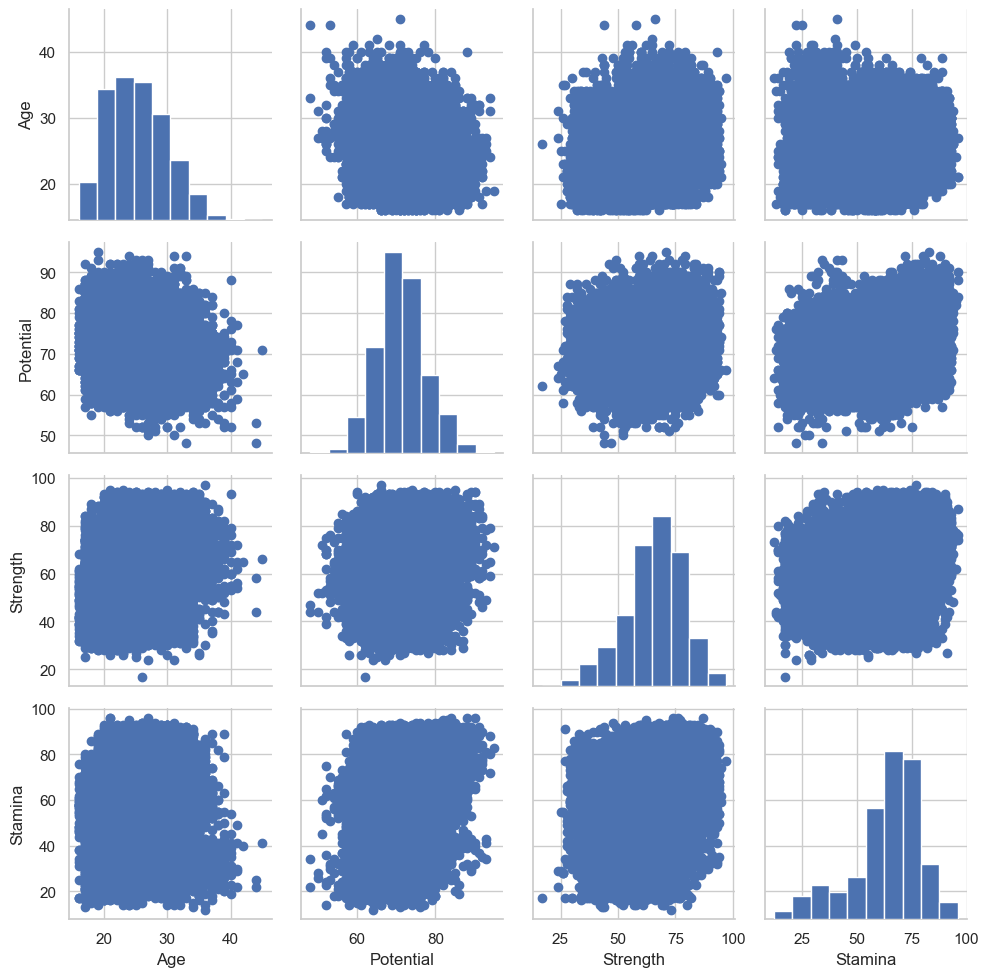

In [60]:
#We can show a univariate distribution on the diagonal

g=sns.PairGrid(fifa_new)
g=g.map_diag(plt.hist)
g=g.map_offdiag(plt.scatter)
plt.show()

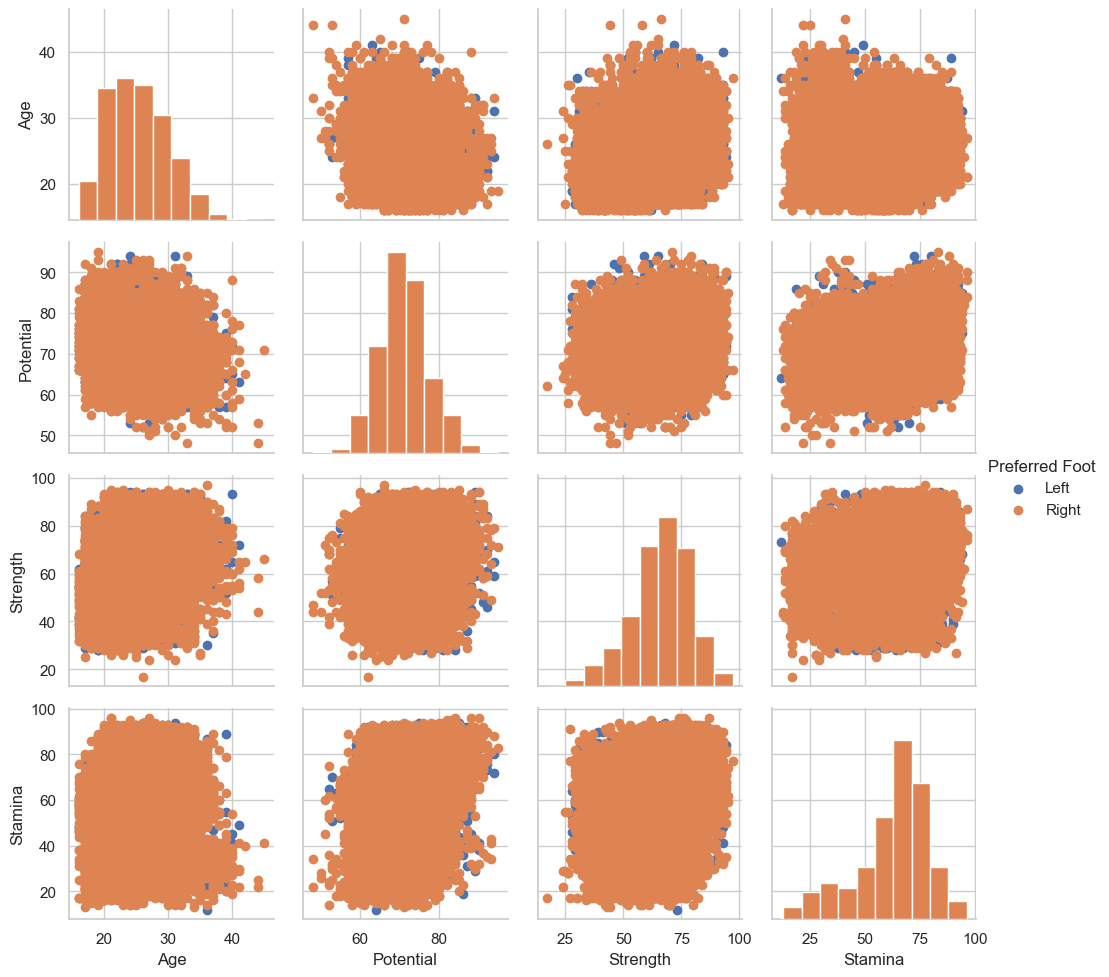

In [61]:
#We can color the points using the categorical variable `Preferred Foot`

g=sns.PairGrid(fifa_new,hue='Preferred Foot')
g=g.map_diag(plt.hist)
g=g.map_offdiag(plt.scatter)
g=g.add_legend()
plt.show()

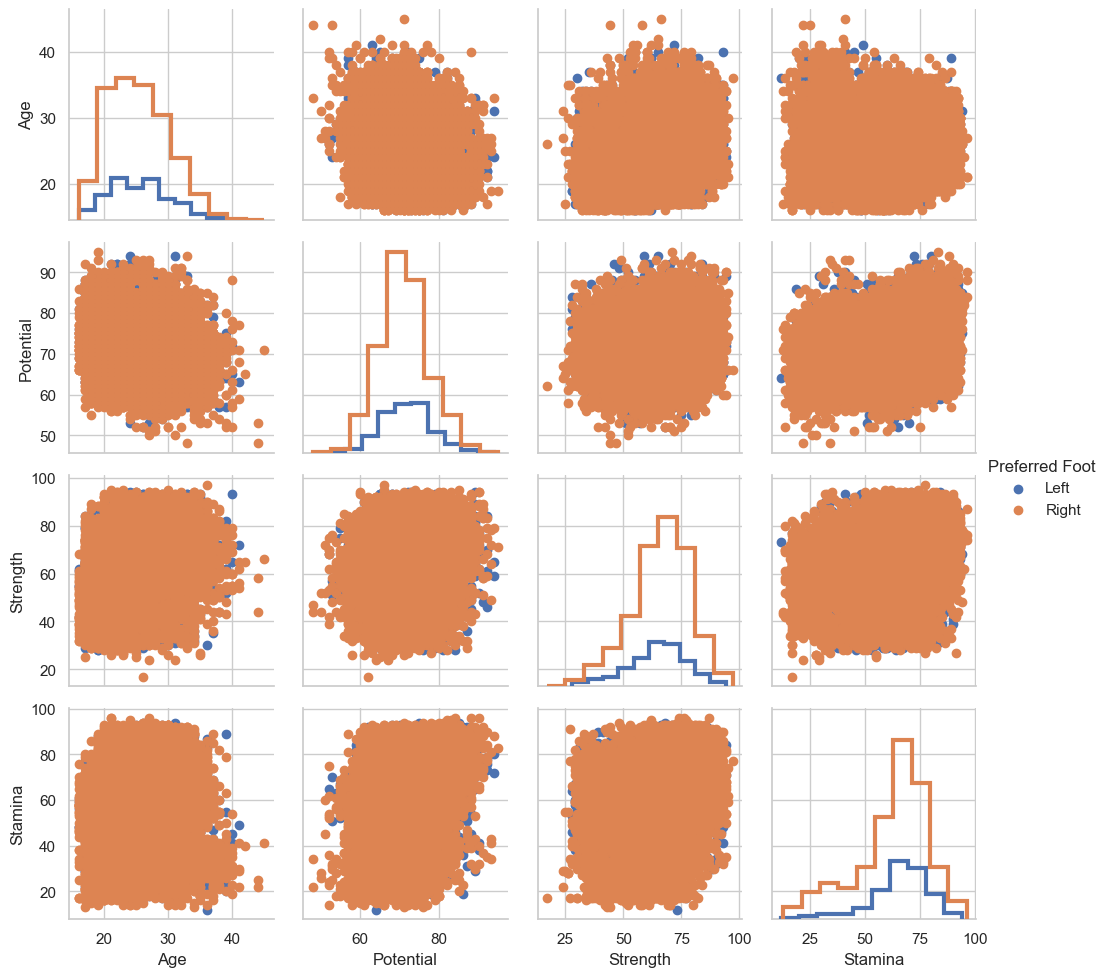

In [62]:
#We can use a different style to show multiple histograms

g=sns.PairGrid(fifa_new,hue='Preferred Foot')
g=g.map_diag(plt.hist,histtype='step',linewidth=3)
g=g.map_offdiag(plt.scatter)
g=g.add_legend()
plt.show()

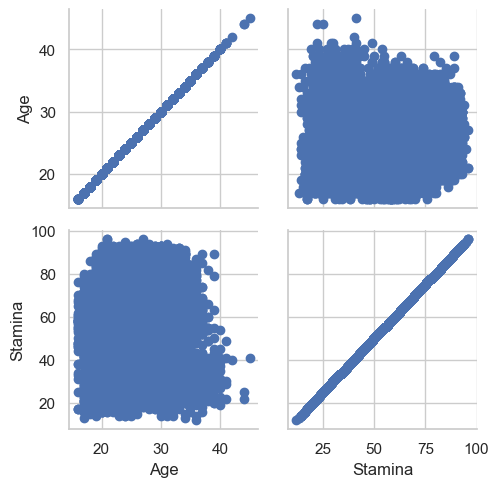

In [63]:
#We can plot a subset of variables

g = sns.PairGrid(fifa_new, vars=['Age', 'Stamina'])
g = g.map(plt.scatter)
plt.show()

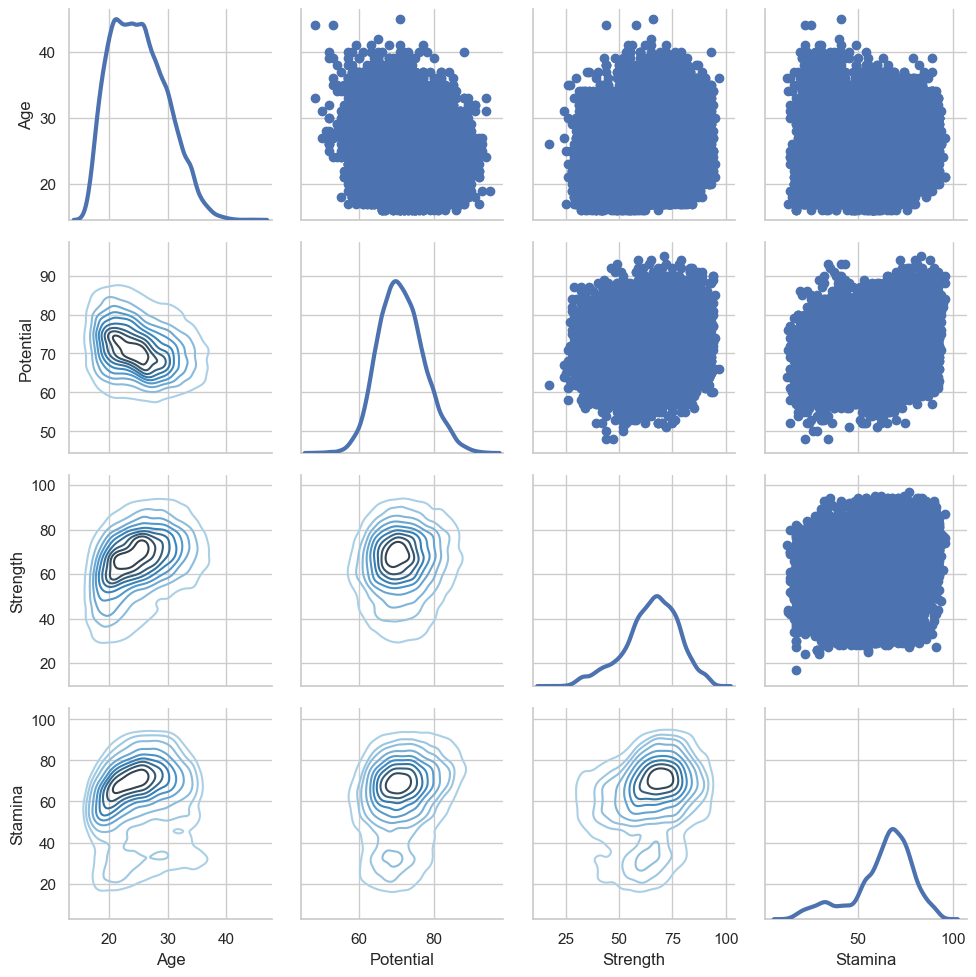

In [64]:
#We can use different functions on the upper and lower triangles

g = sns.PairGrid(fifa_new)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()

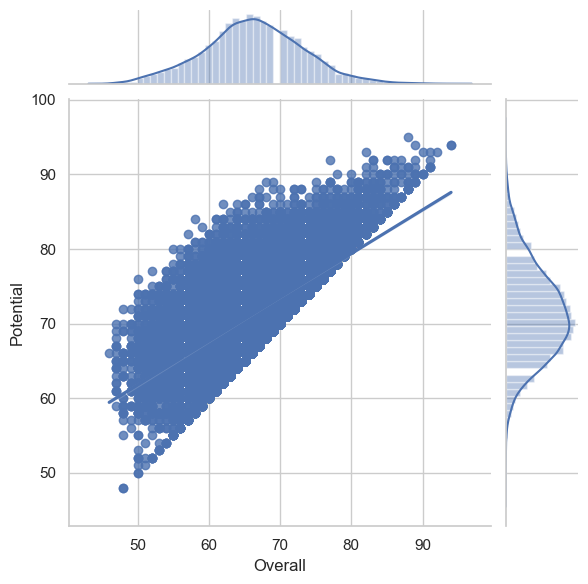

In [65]:
# jointgrid()

g = sns.JointGrid(x="Overall", y="Potential", data=fifa)
g = g.plot(sns.regplot, sns.distplot)
plt.show()

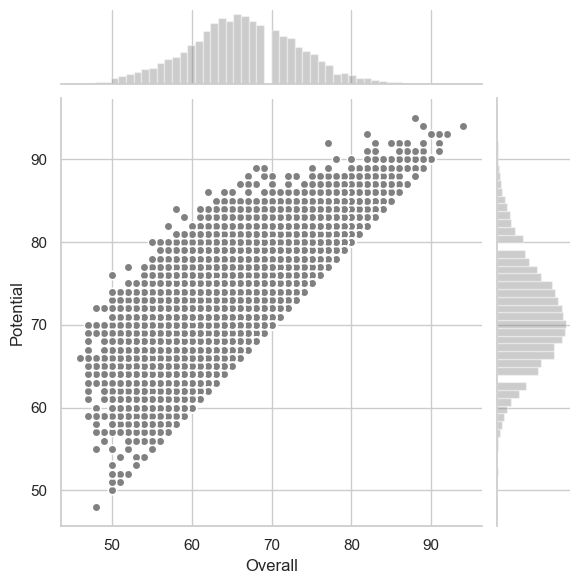

In [66]:
#We can draw the join and marginal plots separately, which allows finer-level control other parameters

g = sns.JointGrid(x="Overall", y="Potential", data=fifa)
g = g.plot_joint(plt.scatter, color=".5", edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color=".5")
plt.show()

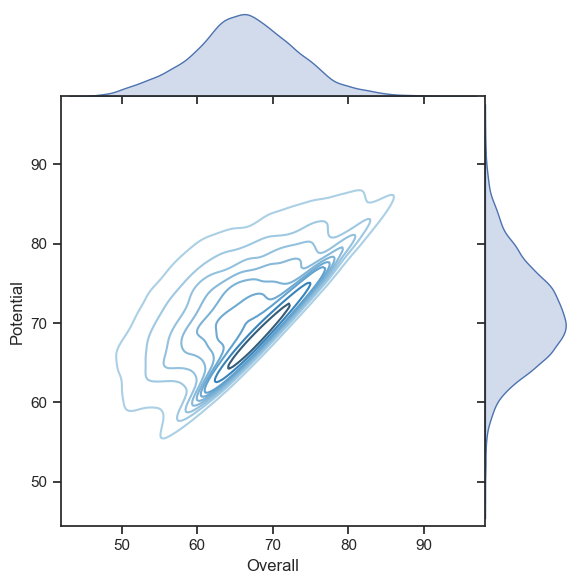

In [79]:
#We can remove the space between the joint and marginal axes

g = sns.JointGrid(x="Overall", y="Potential", data=fifa, space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, shade=True)
plt.show()

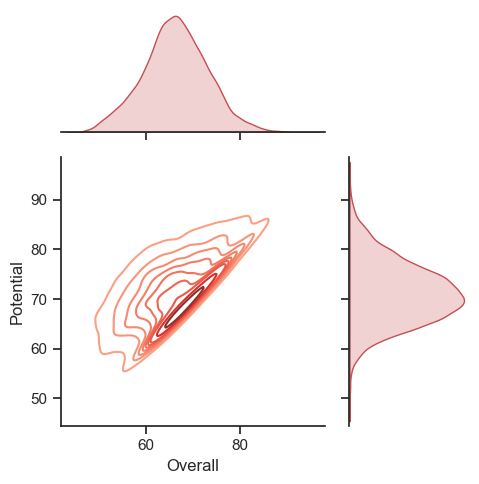

In [80]:
#We can draw a smaller plot with relatively larger marginal axes

g = sns.JointGrid(x="Overall", y="Potential", data=fifa, height=5, ratio=2)
g = g.plot_joint(sns.kdeplot, cmap="Reds_d")
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)
plt.show()

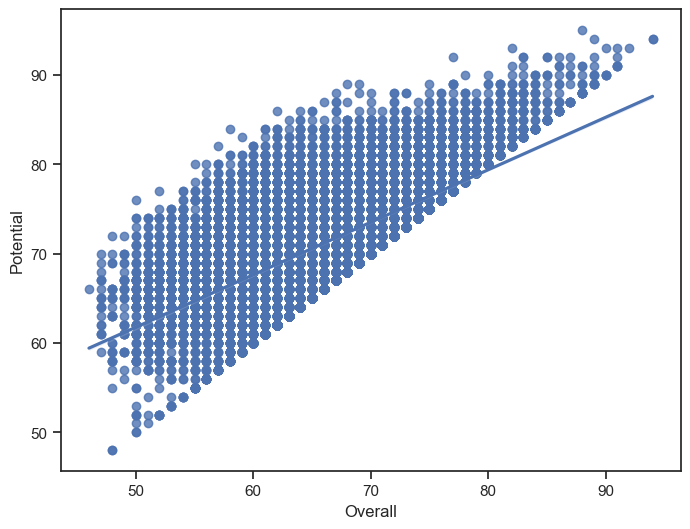

In [81]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa);
plt.show()

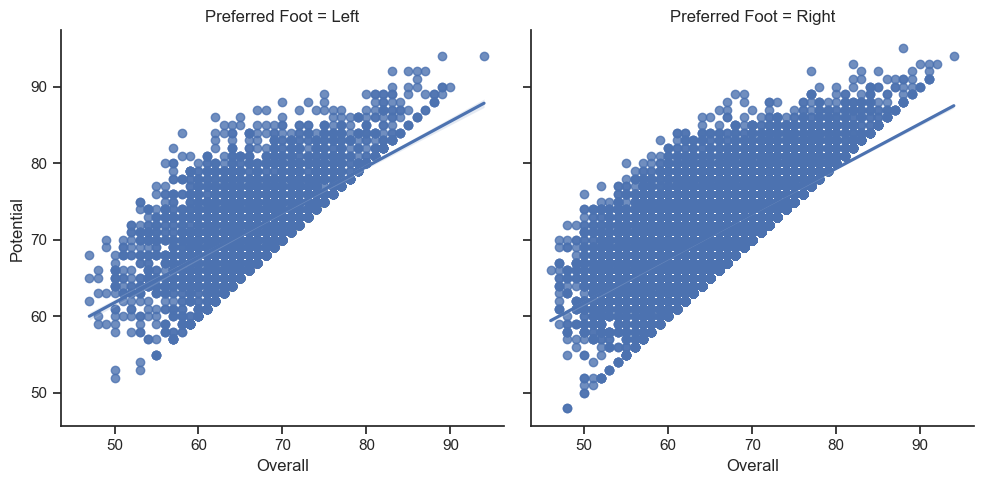

In [82]:
sns.lmplot(x="Overall", y="Potential", col="Preferred Foot", data=fifa, col_wrap=2, height=5, aspect=1)
plt.show()

In [83]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

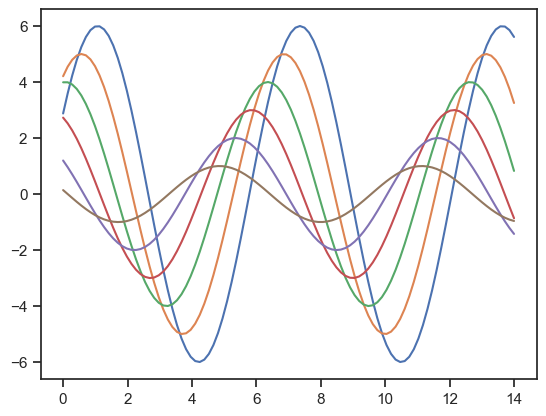

In [84]:
sinplot()
plt.show()

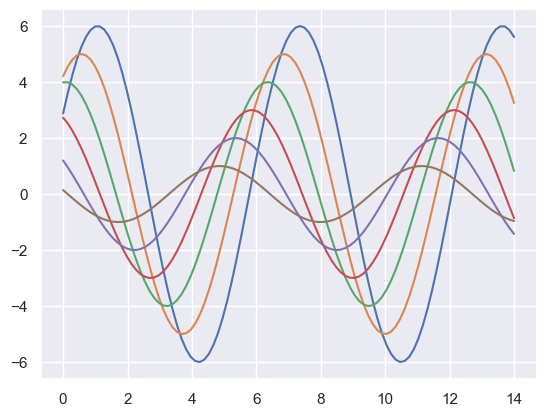

In [85]:
#To switch to seaborn defaults, we need to call the `set()` function

sns.set()
sinplot()
plt.show()

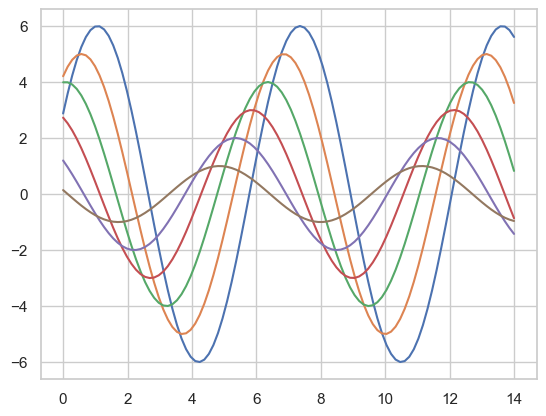

In [86]:
sns.set_style("whitegrid")
sinplot()
plt.show()

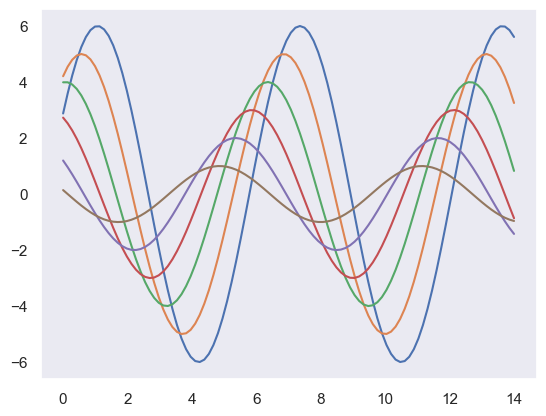

In [87]:
sns.set_style("dark")
sinplot()
plt.show()

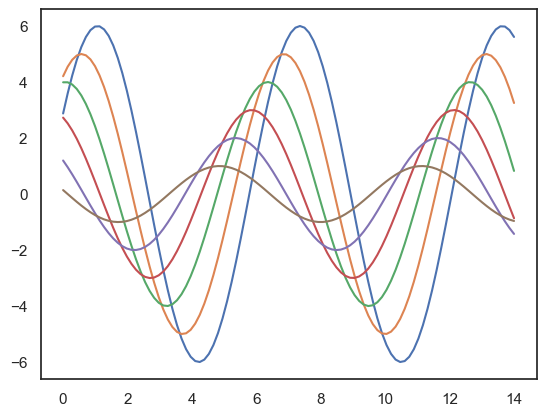

In [88]:
sns.set_style("white")
sinplot()
plt.show()

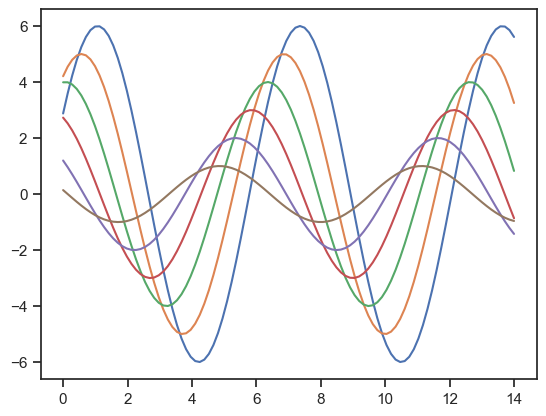

In [89]:
sns.set_style("ticks")
sinplot()
plt.show()
